In [2]:
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load from numpyz.
def get_data(file):
    d = np.load(file, allow_pickle=True)
    return pd.DataFrame(d['arr_1'], columns=d['arr_0'])

# Experiment1.

In [38]:
files = glob.glob('./ex1_numpy/*')
for i, file in enumerate(files):
    print(i, file)

0 ./ex1_numpy/bc_language.npz
1 ./ex1_numpy/mill_task_id_1_1e-07.npz
2 ./ex1_numpy/mill_15types_1_1e-07.npz
3 ./ex1_numpy/task_id_1.npz


In [48]:
num_list = [2, 0, 1, 3]
pd_list = []
for num in num_list:
    for i, file in enumerate(files):
        if i == num:
            pd_list.append(get_data(file))
all_result = pd.concat(pd_list, axis=1)
all_result['epoch'] = [str((i+1) * 25) for i in range(16)]
all_result = all_result.set_index('epoch', drop=True).round(3)
# all_result.describe()
all_result

,mill_15types_1_1e-07_test_1,mill_15types_1_1e-07_train_1,mill_15types_1_1e-07_new_test_1,mill_15types_1_1e-07_test_2,mill_15types_1_1e-07_train_2,mill_15types_1_1e-07_new_test_2,mill_15types_1_1e-07_test_3,mill_15types_1_1e-07_train_3,mill_15types_1_1e-07_new_test_3,bc_language_test_1,...,mill_task_id_1_1e-07_new_test_3,task_id_1_test_1,task_id_1_train_1,task_id_1_new_test_1,task_id_1_test_2,task_id_1_train_2,task_id_1_new_test_2,task_id_1_test_3,task_id_1_train_3,task_id_1_new_test_3
epoch,,,,,,,,,,,,,,,,,,,,,
25,0.255,0.292,0.203,0.302,0.233,0.187,0.275,0.250,0.169,0.187,...,0.216,0.227,0.200,0.180,0.212,0.275,0.167,0.214,0.292,0.187
50,0.372,0.417,0.347,0.358,0.267,0.273,0.345,0.275,0.327,0.236,...,0.345,0.207,0.208,0.200,0.194,0.125,0.135,0.196,0.125,0.196
75,0.356,0.500,0.311,0.405,0.375,0.333,0.390,0.342,0.291,0.232,...,0.338,0.227,0.258,0.182,0.185,0.242,0.124,0.196,0.150,0.137
100,0.435,0.558,0.396,0.473,0.517,0.372,0.439,0.533,0.390,0.203,...,0.356,0.209,0.217,0.137,0.173,0.192,0.131,0.142,0.208,0.158
125,0.396,0.567,0.345,0.459,0.475,0.401,0.450,0.525,0.345,0.153,...,0.401,0.142,0.192,0.153,0.182,0.208,0.126,0.144,0.183,0.126
150,0.405,0.617,0.426,0.484,0.583,0.405,0.547,0.617,0.428,0.173,...,0.369,0.194,0.158,0.153,0.180,0.142,0.128,0.216,0.192,0.126
175,0.459,0.400,0.414,0.381,0.450,0.410,0.374,0.408,0.423,0.153,...,0.403,0.203,0.208,0.146,0.180,0.200,0.203,0.180,0.158,0.117
200,0.450,0.608,0.475,0.514,0.642,0.428,0.529,0.542,0.408,0.189,...,0.396,0.153,0.183,0.133,0.187,0.208,0.133,0.164,0.175,0.115
225,0.426,0.617,0.396,0.484,0.592,0.444,0.484,0.550,0.419,0.173,...,0.446,0.212,0.200,0.176,0.221,0.217,0.142,0.214,0.158,0.173


In [49]:
ex = 'experiment1'
new_test = []
test = []
train = []
def check_name(sentence, test_data_type):
    if 'mill_task_id' in sentence:
        name = f'mill_task_id_{test_data_type}'
    elif 'bc' in sentence:
        name = f'behavior_cloning_{test_data_type}'
    elif 'task_id' in sentence:
        name = f'task_id_{test_data_type}'
    elif 'mill' in sentence:
        name = f'mill_{test_data_type}'
    else:
        raise Exception("name が見つかりません!")
    return name
    
for i, x in enumerate(list(all_result.columns)):
    if 'new_test' in x:
        new_test.append(i)
        name = check_name(x, 'new_test')
    elif 'test' in x:
        test.append(i)
        name = check_name(x, 'test')
    elif 'train' in x:
        train.append(i)
        name = check_name(x, 'train')
    print(name)
    all_result.rename(columns={x: name}, inplace=True)

mill_test
mill_train
mill_new_test
mill_test
mill_train
mill_new_test
mill_test
mill_train
mill_new_test
behavior_cloning_test
behavior_cloning_train
behavior_cloning_new_test
behavior_cloning_test
behavior_cloning_train
behavior_cloning_new_test
behavior_cloning_test
behavior_cloning_train
behavior_cloning_new_test
mill_task_id_test
mill_task_id_train
mill_task_id_new_test
mill_task_id_test
mill_task_id_train
mill_task_id_new_test
mill_task_id_test
mill_task_id_train
mill_task_id_new_test
task_id_test
task_id_train
task_id_new_test
task_id_test
task_id_train
task_id_new_test
task_id_test
task_id_train
task_id_new_test


result_png/experiment1_train.png


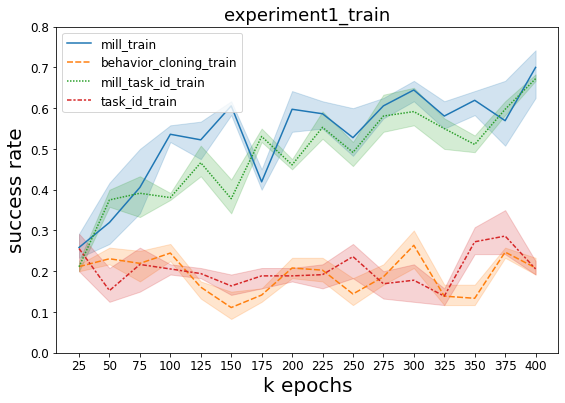

In [50]:
ax = sns.lineplot(data=all_result.iloc[:, train])
test_data_type = 'train'
ax.figure.set_size_inches(9, 6)
ax.set(ylabel = "", ylim=(0.0, 0.8))
plt.legend(fontsize=12, loc='upper left')
plt.tick_params(labelsize=12)
plt.title(f"{ex}_{test_data_type}", fontsize=18)
plt.xlabel("k epochs", fontsize=20)
plt.ylabel("success rate", fontsize=20)
f = ax.get_figure()
print(f'result_png/{ex}_{test_data_type}.png')
f.savefig(f'result_png/{ex}_{test_data_type}.png')

result_png/experiment1_test.png


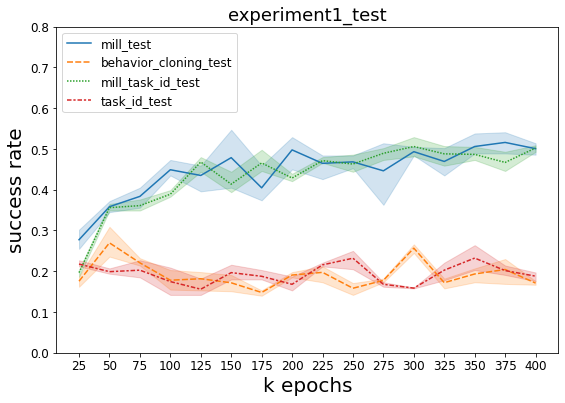

In [51]:
ax = sns.lineplot(data=all_result.iloc[:, test])
test_data_type = 'test'
ax.figure.set_size_inches(9, 6)
ax.set(ylabel = "", ylim=(0.0, 0.8))
plt.legend(fontsize=12, loc='upper left')
plt.tick_params(labelsize=12)
plt.title(f"{ex}_{test_data_type}", fontsize=18)
plt.xlabel("k epochs", fontsize=20)
plt.ylabel("success rate", fontsize=20)
f = ax.get_figure()
print(f'result_png/{ex}_{test_data_type}.png')
f.savefig(f'result_png/{ex}_{test_data_type}.png')

result_png/experiment1_new_test.png


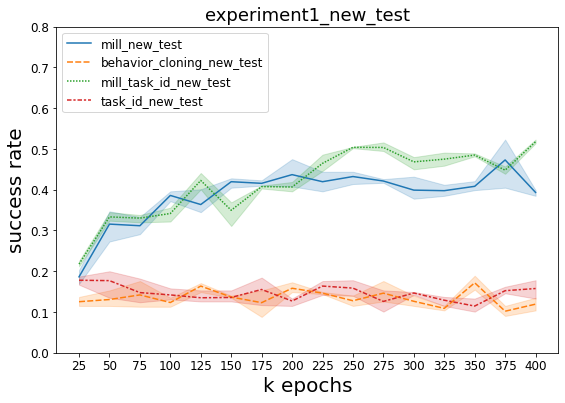

In [52]:
ax = sns.lineplot(data=all_result.iloc[:, new_test])
test_data_type = 'new_test'
ax.figure.set_size_inches(9, 6)
ax.set(ylabel = "", ylim=(0.0, 0.8))
plt.legend(fontsize=12, loc='upper left')
plt.tick_params(labelsize=12)
plt.title(f"{ex}_{test_data_type}", fontsize=18)
plt.xlabel("k epochs", fontsize=20)
plt.ylabel("success rate", fontsize=20)
f = ax.get_figure()
print(f'result_png/{ex}_{test_data_type}.png')
f.savefig(f'result_png/{ex}_{test_data_type}.png')

# experiment2

In [23]:
files = glob.glob('./ex2_numpy/*')
for i, file in enumerate(files):
    print(i, file)

0 ./ex2_numpy/mill_random_instruction_1_1e-07.npz
1 ./ex2_numpy/petnet_image.npz
2 ./ex2_numpy/petnet_init_image_1.npz
3 ./ex2_numpy/petnet_image_1_last.npz
4 ./ex2_numpy/mill_random_instruction_1_1e-07_first.npz
5 ./ex2_numpy/mill_random_instruction_1_1e-07_last.npz


In [24]:
num_list = [0,1,2,3,4,5]
pd_list = []
for i, file in enumerate(files):
    if i in num_list:
        pd_list.append(get_data(file))
all_result = pd.concat(pd_list, axis=1)
all_result['epoch'] = [str((i+1) * 25) + 'k' for i in range(16)]
all_result = all_result.set_index('epoch', drop=True).round(3)
# all_result.describe()
# all_result

In [25]:
# all_result.plot()

In [26]:
ex = 'experiment2'
new_test = []
test = []
train = []
def check_name(sentence, test_data_type):
    if 'mill_random_instruction_1_1e-07_last' in sentence:
        name = f'mill_last_{test_data_type}'
    elif 'mill_random_instruction_1_1e-07_first' in sentence:
        name = f'mill_init_{test_data_type}'
    elif 'mill_random_instruction_1_1e-07' in sentence:
        name = f'mill_{test_data_type}'
    elif 'petnet_init_image_1' in sentence:
        name = f'petnet_init_{test_data_type}'
    elif 'petnet_image_1_last' in sentence:
        name = f'petnet_goal_{test_data_type}'
    elif 'petnet_image' in sentence:
        name = f'petnet_{test_data_type}'
    else:
        print(sentence)
        raise Exception("name が見つかりません!")
    return name
    
for i, x in enumerate(list(all_result.columns)):
    if 'new_test' in x:
        new_test.append(i)
        name = check_name(x, 'new_test')
    elif 'test' in x:
        test.append(i)
        name = check_name(x, 'test')
    elif 'train' in x:
        train.append(i)
        name = check_name(x, 'train')
#     print(x)
#     print(name)
    all_result.rename(columns={x: name}, inplace=True)

result_png/experiment2_train.png


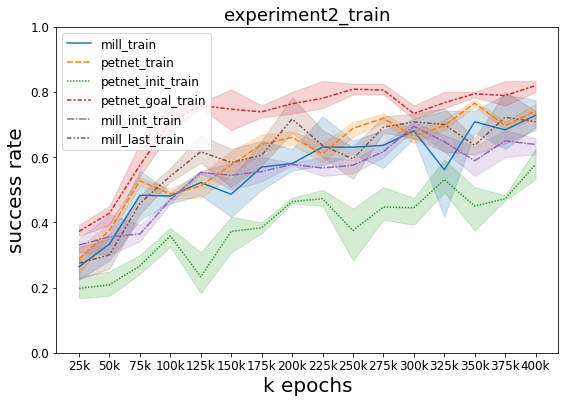

In [30]:
ax = sns.lineplot(data=all_result.iloc[:, train])
test_data_type = 'train'
ax.figure.set_size_inches(9, 6)
ax.set(ylabel = "", ylim=(0.0, 1.0))
plt.legend(fontsize=12, loc='upper left')
plt.tick_params(labelsize=12)
plt.title(f"{ex}_{test_data_type}", fontsize=18)
plt.xlabel("k epochs", fontsize=20)
plt.ylabel("success rate", fontsize=20)
f = ax.get_figure()
print(f'result_png/{ex}_{test_data_type}.png')
f.savefig(f'result_png/{ex}_{test_data_type}.png')

result_png/experiment2_test.png


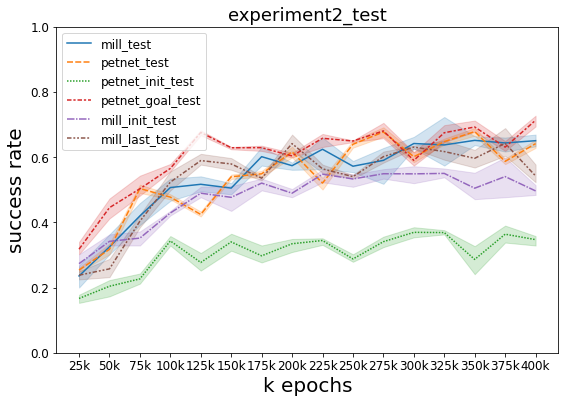

In [31]:
ax = sns.lineplot(data=all_result.iloc[:, test])
test_data_type = 'test'
ax.figure.set_size_inches(9, 6)
ax.set(ylabel = "", ylim=(0.0, 1.0))
plt.legend(fontsize=12, loc='upper left')
plt.tick_params(labelsize=12)
plt.title(f"{ex}_{test_data_type}", fontsize=18)
plt.xlabel("k epochs", fontsize=20)
plt.ylabel("success rate", fontsize=20)
f = ax.get_figure()
print(f'result_png/{ex}_{test_data_type}.png')
f.savefig(f'result_png/{ex}_{test_data_type}.png')

result_png/experiment2_new_test.png


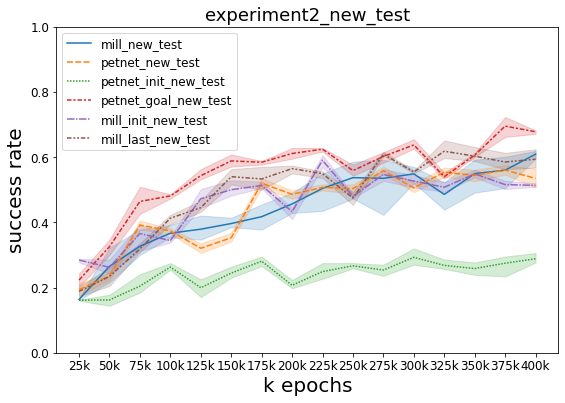

In [32]:
ax = sns.lineplot(data=all_result.iloc[:, new_test])
test_data_type = 'new_test'
ax.figure.set_size_inches(9, 6)
ax.set(ylabel = "", ylim=(0.0, 1.0))
plt.legend(fontsize=12, loc='upper left')
plt.tick_params(labelsize=12)
plt.title(f"{ex}_{test_data_type}", fontsize=18)
plt.xlabel("k epochs", fontsize=20)
plt.ylabel("success rate", fontsize=20)
f = ax.get_figure()
print(f'result_png/{ex}_{test_data_type}.png')
f.savefig(f'result_png/{ex}_{test_data_type}.png')

# Experiment3. Ablation.

In [31]:
files = glob.glob('./ex3_instruction_types/*')
for i, file in enumerate(files):
    print(i, file)

0 ./ex3_instruction_types/mill_15types_1_1e-07_language.npz
1 ./ex3_instruction_types/mill_task_id_1_1e-07_language.npz
2 ./ex3_instruction_types/mill_15types_1_1e-07_both.npz
3 ./ex3_instruction_types/mill_word_1_1e-07_both.npz
4 ./ex3_instruction_types/mill_sentence_both.npz
5 ./ex3_instruction_types/mill_sentence_language.npz
6 ./ex3_instruction_types/mill_30types_both.npz
7 ./ex3_instruction_types/mill_30types_language.npz
8 ./ex3_instruction_types/mill_task_id_1_1e-07_both.npz
9 ./ex3_instruction_types/mill_word_instruction_1_1e-07_language.npz


In [55]:
num_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
num_list = [0, 1, 5, 7, 9]
num_list = [2, 3, 4, 6, 8]
pd_list = []
for i, file in enumerate(files):
    if i in num_list:
        pd_list.append(get_data(file))
all_result = pd.concat(pd_list, axis=1)
all_result['epoch'] = [str((i+1) * 25) + 'k' for i in range(16)]
all_result = all_result.set_index('epoch', drop=True).round(3)
# all_result.describe()
all_result

,mill_random_instruction_1_1e-07_test_1,mill_random_instruction_1_1e-07_train_1,mill_random_instruction_1_1e-07_new_test_1,mill_random_instruction_1_1e-07_test_2,mill_random_instruction_1_1e-07_train_2,mill_random_instruction_1_1e-07_new_test_2,mill_random_instruction_1_1e-07_test_3,mill_random_instruction_1_1e-07_train_3,mill_random_instruction_1_1e-07_new_test_3,mill_word_instruction_1_1e-07_test_1,...,mill_word_instruction_1_1e-07_new_test_1,mill_image_language_1e-07_test_1,mill_image_language_1e-07_train_1,mill_image_language_1e-07_new_test_1,mill_30types_instruction_1_1e-07_test_1,mill_30types_instruction_1_1e-07_train_1,mill_30types_instruction_1_1e-07_new_test_1,mill_task_id_1_1e-07_test_1,mill_task_id_1_1e-07_train_1,mill_task_id_1_1e-07_new_test_1
epoch,,,,,,,,,,,,,,,,,,,,,
25k,0.200,0.225,0.167,0.268,0.275,0.162,0.239,0.292,0.162,0.248,...,0.196,0.297,0.350,0.311,0.221,0.225,0.191,0.221,0.242,0.232
50k,0.363,0.367,0.322,0.302,0.350,0.216,0.309,0.283,0.257,0.338,...,0.293,0.351,0.375,0.336,0.365,0.358,0.304,0.412,0.417,0.383
75k,0.459,0.558,0.378,0.408,0.408,0.300,0.392,0.483,0.302,0.486,...,0.417,0.423,0.442,0.331,0.432,0.467,0.428,0.453,0.567,0.381
100k,0.520,0.492,0.354,0.534,0.458,0.354,0.466,0.492,0.392,0.493,...,0.399,0.511,0.508,0.320,0.455,0.442,0.403,0.484,0.483,0.383
125k,0.514,0.558,0.347,0.541,0.525,0.421,0.495,0.483,0.369,0.500,...,0.529,0.527,0.592,0.396,0.489,0.567,0.473,0.525,0.608,0.450
150k,0.509,0.533,0.414,0.486,0.417,0.385,0.520,0.508,0.390,0.545,...,0.559,0.466,0.550,0.448,0.493,0.617,0.491,0.473,0.483,0.435
175k,0.631,0.650,0.378,0.599,0.558,0.455,0.574,0.500,0.419,0.577,...,0.536,0.559,0.633,0.563,0.511,0.558,0.502,0.552,0.650,0.486
200k,0.577,0.625,0.491,0.561,0.558,0.468,0.583,0.558,0.410,0.606,...,0.595,0.538,0.758,0.518,0.493,0.608,0.534,0.475,0.642,0.547
225k,0.563,0.575,0.435,0.660,0.725,0.550,0.649,0.592,0.527,0.599,...,0.610,0.626,0.625,0.505,0.536,0.617,0.484,0.608,0.717,0.577


In [56]:
ex = 'ex3_instruction_types_both'
new_test = []
test = []
train = []
def check_name(sentence, test_data_type):
    name = None
    if '15types' in sentence or 'random_instruction' in sentence:
        name = f'15types_both_{test_data_type}'
#         if 'language' in sentence:
#             name = f'15types_language_{test_data_type}'
#         elif 'both' in sentence:
#             name = f'15types_both_{test_data_type}'
    elif '30types' in sentence:
        name = f'30types_both_{test_data_type}'
#         if 'language' in sentence:
#             name = f'30types_language_{test_data_type}'
#         elif 'both' in sentence:
#             name = f'30types_both_{test_data_type}'
    elif 'task_id' in sentence:
        name = f'task_id_both_{test_data_type}'
#         if 'language' in sentence:
#             name = f'task_id_language_{test_data_type}'
#         elif 'both' in sentence:
#             name = f'task_id_both_{test_data_type}'
    elif 'word' in sentence:
        name = f'word_both_{test_data_type}'
#         if 'language' in sentence:
#             name = f'word_language_{test_data_type}'
#         elif 'both' in sentence:
#             name = f'word_both_{test_data_type}'
    elif 'image_language' in sentence:
        name = f'sentence_both_{test_data_type}'
#         if 'language' in sentence:
#             name = f'sentence_language_{test_data_type}'
#         elif 'both' in sentence:
#             name = f'sentence_both_{test_data_type}'
    if not name:
        print(sentence)
        raise Exception("name が見つかりません!")
    return name
    
for i, x in enumerate(list(all_result.columns)):
    if 'new_test' in x:
        new_test.append(i)
        name = check_name(x, 'new_test')
    elif 'test' in x:
        test.append(i)
        name = check_name(x, 'test')
    elif 'train' in x:
        train.append(i)
        name = check_name(x, 'train')
#     print(x)
#     print(name)
    all_result.rename(columns={x: name}, inplace=True)

result_png/ex3_instruction_types_both_new_test.png


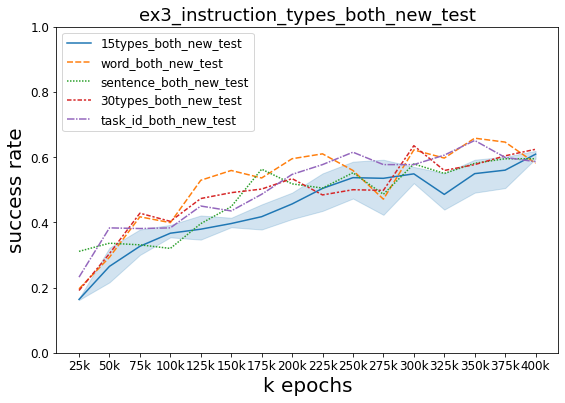

In [59]:
ax = sns.lineplot(data=all_result.iloc[:, new_test])
test_data_type = 'new_test'
ax.figure.set_size_inches(9, 6)
ax.set(ylabel = "", ylim=(0.0, 1.0))
plt.legend(fontsize=12, loc='upper left')
plt.tick_params(labelsize=12)
plt.title(f"{ex}_{test_data_type}", fontsize=18)
plt.xlabel("k epochs", fontsize=20)
plt.ylabel("success rate", fontsize=20)
f = ax.get_figure()
print(f'result_png/{ex}_{test_data_type}.png')
# f.savefig(f'result_png/{ex}_{test_data_type}_.png')

# Mill Hyperparameter.  random_instructionで評価し直す. Language, BOTH.
# 1e-01 ~ 1e-10まで学習中.

5,6,9,10が進行中.その他は学習済み. random_seed=1.

In [6]:
# epoch
files = glob.glob('./ex3_hypa/*')
for i, file in enumerate(files):
    print(i, file)

0 ./ex3_hypa/mill_hypa_both.npz


# instruction_types. Using Language and Both. Seed=1.
Task ID. , DONE.
Word. DOING , DONE
Sentence. DONE ,DONE.
15types. , ,
30types. DONE, DONE.

In [7]:
num_list = [0]
# num_list = list(range(8))
# print(num_list)
pd_list = []
for i, file in enumerate(files):
    if i in num_list:
        pd_list.append(get_data(file))
all_result = pd.concat(pd_list, axis=1)
all_result['epoch'] = [str((i+1) * 25) + 'k' for i in range(16)]
all_result = all_result.set_index('epoch', drop=True).round(3)
# all_result.describe()
all_result

,1_test,1_train,1_new_test,0.01_test,0.001_test,0.0001_test,0.01_train,0.001_train,0.0001_train,0.01_new_test,...,1e-07_new_test,1e-08_test,1e-08_train,1e-08_new_test,1e-09_test,1e-09_train,1e-09_new_test,1e-10_test,1e-10_train,1e-10_new_test
epoch,,,,,,,,,,,,,,,,,,,,,
25k,0.171,0.217,0.182,0.167,0.313,0.300,0.175,0.308,0.233,0.133,...,0.207,0.194,0.167,0.200,0.207,0.183,0.162,0.286,0.217,0.158
50k,0.180,0.183,0.151,0.232,0.218,0.284,0.158,0.258,0.267,0.182,...,0.392,0.277,0.292,0.255,0.212,0.175,0.196,0.232,0.208,0.259
75k,0.311,0.317,0.191,0.234,0.250,0.232,0.292,0.217,0.333,0.275,...,0.439,0.507,0.483,0.349,0.239,0.242,0.230,0.266,0.233,0.158
100k,0.340,0.258,0.284,0.309,0.340,0.338,0.292,0.242,0.300,0.189,...,0.532,0.502,0.458,0.318,0.257,0.267,0.169,0.209,0.208,0.167
125k,0.306,0.292,0.144,0.306,0.196,0.270,0.267,0.217,0.308,0.279,...,0.462,0.509,0.517,0.374,0.189,0.233,0.234,0.225,0.325,0.264
150k,0.282,0.267,0.250,0.333,0.300,0.376,0.300,0.250,0.425,0.300,...,0.550,0.428,0.533,0.387,0.207,0.175,0.169,0.372,0.408,0.333
175k,0.324,0.342,0.257,0.349,0.268,0.360,0.400,0.308,0.342,0.243,...,0.563,0.601,0.575,0.419,0.300,0.283,0.191,0.340,0.425,0.318
200k,0.354,0.392,0.214,0.338,0.365,0.374,0.392,0.350,0.417,0.268,...,0.637,0.554,0.600,0.495,0.182,0.217,0.223,0.426,0.408,0.381
225k,0.315,0.300,0.259,0.315,0.320,0.369,0.350,0.317,0.408,0.304,...,0.545,0.633,0.667,0.583,0.291,0.275,0.173,0.412,0.442,0.351


In [51]:
train, test, new_test = [], [], []
all_result.columns
for name in all_result.columns:
    if 'new_test' in name:
        to_name = name.split('_')
        print(to_name)
#         all_result.rename(columns={name: name}, inplace=True)
        new_test.append(name)
    elif 'test' in name:
        test.append(name)
    elif 'train' in name:
        train.append(name)
hypa_test = all_result[test]
hypa_new_test = all_result[new_test]
hypa_train = all_result[train]
# print(hypa_test)

['1', 'new', 'test']
['0.01', 'new', 'test']
['0.001', 'new', 'test']
['0.0001', 'new', 'test']
['0.1', 'new', 'test']
['1e-05', 'new', 'test']
['1e-06', 'new', 'test']
['1e-07', 'new', 'test']
['1e-08', 'new', 'test']
['1e-09', 'new', 'test']
['1e-10', 'new', 'test']


In [58]:
result_test = hypa_test.max()
result_train = hypa_train.max()
result_new_test = hypa_new_test.max()

In [79]:
# df_new = df.rename(columns={'A': 'Col_1'}, index={'ONE': 'Row_1'})
for i in result_new_test.index:
#     print(i)
    name = i.split('_')[0]
#     print(name)
    result_new_test.rename(index={i : name}, inplace=True)

Visualization and save as png file.

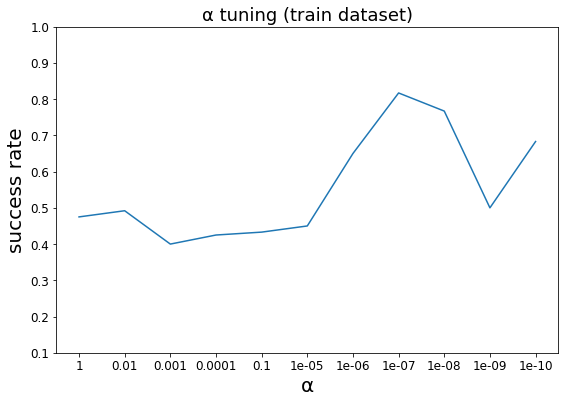

In [83]:
ax = sns.lineplot(data=result_train)
ax.figure.set_size_inches(9,6)
ax.set(ylabel = "success rate", ylim=(0.1, 1.0))
f = ax.get_figure()

name = 'α tuning (train dataset)'
plt.tick_params(labelsize=12)
plt.title(name, fontsize=18)
plt.xlabel("α", fontsize=20)
plt.ylabel("success rate", fontsize=20)
f.savefig(f'result_png/ex3_hypa_train.png')

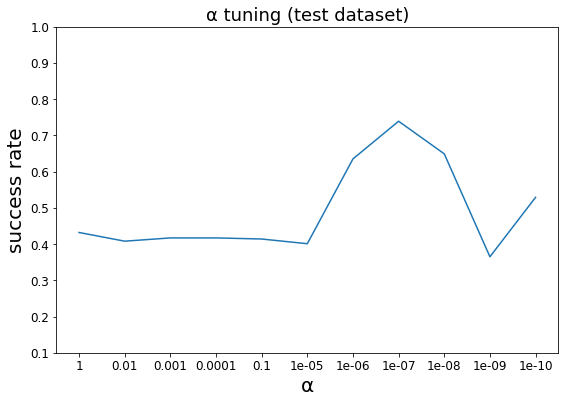

In [84]:
ax = sns.lineplot(data=result_test)
ax.figure.set_size_inches(9,6)
ax.set(ylabel = "success rate", ylim=(0.1, 1.0))
f = ax.get_figure()

name = 'α tuning (test dataset)'
plt.tick_params(labelsize=12)
plt.title(name, fontsize=18)
plt.xlabel("α", fontsize=20)
plt.ylabel("success rate", fontsize=20)
f.savefig(f'result_png/ex3_hypa_test.png')

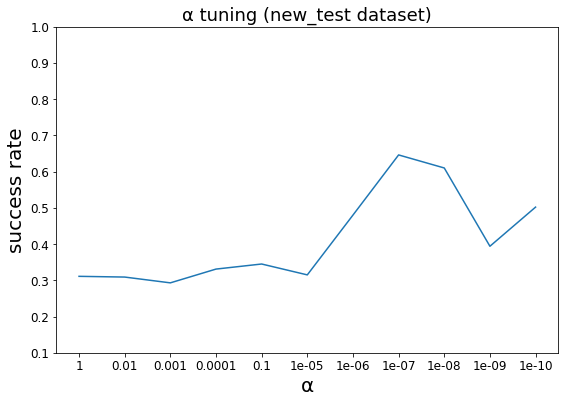

In [85]:
ax = sns.lineplot(data=result_new_test)
ax.figure.set_size_inches(9,6)
ax.set(ylabel = "success rate", ylim=(0.1, 1.0))
f = ax.get_figure()

name = 'α tuning (new_test dataset)'
plt.tick_params(labelsize=12)
plt.title(name, fontsize=18)
plt.xlabel("α", fontsize=20)
plt.ylabel("success rate", fontsize=20)
f.savefig(f'result_png/ex3_hypa_new_test.png')

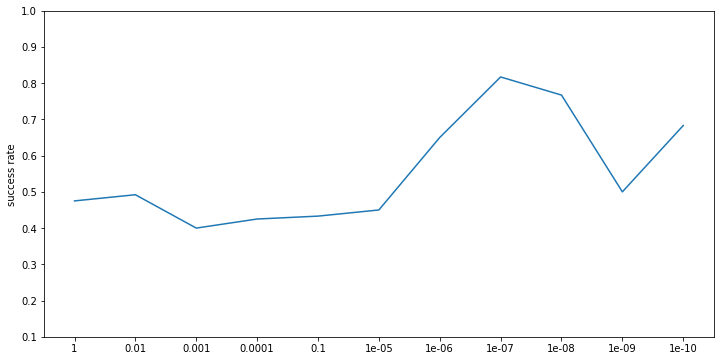

In [78]:
ax = sns.lineplot(data=result_train)
ax.figure.set_size_inches(12,6)
ax.set(ylabel = "success rate", ylim=(0.1, 1.0))
f = ax.get_figure()
# f.savefig('result_png/mill_hypara_new_test.png')

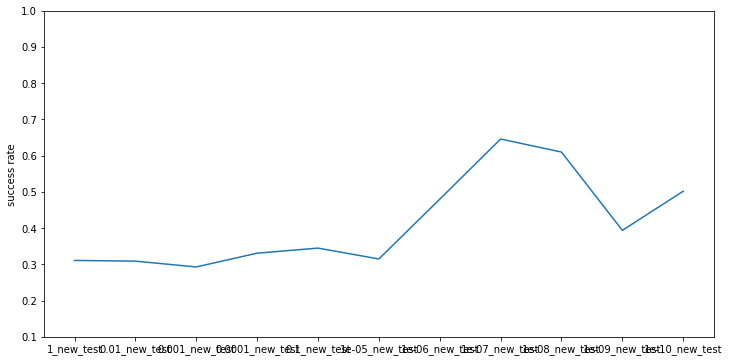

In [45]:
ax = sns.lineplot(data=result_new_test)
ax.figure.set_size_inches(12,6)
ax.set(ylabel = "success rate", ylim=(0.1, 1.0))
f = ax.get_figure()
# f.savefig('result_png/mill_hypara_new_test.png')

Behavior Cloning VS Mill Language type.

In [207]:
# epoch
# len(all_result.iloc[:, 30:57].columns)
all_result.iloc[:, 57:]
# bc_vs_mill = all_result.iloc[:, range(30, 46, 3)]
# mill_hypara
# mill_hypara['1e-07'] = mill_hypara[['mill_image_language_1e-07_test_1', 'mill_image_language_1e-07_test_2', 'mill_image_language_1e-07_test_3']].mean(1)
# for name in mill_hypara.columns:
#     if name == '1e-07':
#         continue
#     elif name[20:-7] == '1e-07':
#         mill_hypara = mill_hypara.drop(name, axis=1)
#     else:
#         mill_hypara = mill_hypara.rename(columns={name: name[20:-7]})

# reindex_list = ['1e-07'] + list(mill_hypara.columns[:-1])
# mill_hypara = mill_hypara.reindex(columns=reindex_list)

,mill_init_image_1_1e-07_test_1,mill_init_image_1_1e-07_train_1,mill_init_image_1_1e-07_new_test_1,mill_init_image_1_1e-07_test_2,mill_init_image_1_1e-07_train_2,mill_init_image_1_1e-07_new_test_2,mill_init_image_1_1e-07_test_3,mill_init_image_1_1e-07_train_3,mill_init_image_1_1e-07_new_test_3,mill_init_image_task_id_1_1e-07_test_1,...,petnet_image_new_test_3,petnet_init_image_1_test_1,petnet_init_image_1_train_1,petnet_init_image_1_new_test_1,petnet_init_image_1_test_2,petnet_init_image_1_train_2,petnet_init_image_1_new_test_2,petnet_init_image_1_test_3,petnet_init_image_1_train_3,petnet_init_image_1_new_test_3
epoch,,,,,,,,,,,,,,,,,,,,,
25k,0.194,0.175,0.122,0.151,0.150,0.122,0.151,0.175,0.088,0.209,...,0.169,0.153,0.192,0.164,0.169,0.167,0.160,0.178,0.233,0.160
50k,0.239,0.275,0.252,0.236,0.225,0.216,0.225,0.250,0.245,0.284,...,0.245,0.223,0.200,0.164,0.216,0.175,0.144,0.173,0.250,0.178
75k,0.291,0.367,0.333,0.297,0.317,0.309,0.338,0.242,0.288,0.340,...,0.376,0.225,0.300,0.241,0.212,0.242,0.185,0.243,0.258,0.187
100k,0.309,0.275,0.286,0.306,0.350,0.286,0.282,0.300,0.309,0.423,...,0.372,0.358,0.325,0.255,0.329,0.367,0.275,0.342,0.383,0.259
125k,0.372,0.417,0.270,0.372,0.342,0.273,0.367,0.425,0.236,0.408,...,0.347,0.252,0.308,0.225,0.306,0.208,0.203,0.273,0.183,0.171
150k,0.329,0.383,0.295,0.293,0.333,0.266,0.302,0.383,0.255,0.430,...,0.342,0.313,0.417,0.264,0.365,0.308,0.230,0.342,0.392,0.239
175k,0.255,0.458,0.304,0.279,0.417,0.360,0.322,0.408,0.261,0.462,...,0.532,0.277,0.400,0.282,0.329,0.400,0.295,0.286,0.350,0.266
200k,0.432,0.442,0.322,0.399,0.525,0.291,0.414,0.467,0.293,0.484,...,0.507,0.309,0.458,0.198,0.345,0.475,0.200,0.349,0.458,0.223
225k,0.423,0.467,0.356,0.363,0.575,0.313,0.399,0.450,0.358,0.477,...,0.493,0.351,0.450,0.275,0.331,0.467,0.227,0.351,0.500,0.245
